# Qualitative Analysis

In this notebook we'll explorer mainly qualitative / categorical features

In [7]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [8]:
%run ./module_P2_utils.ipynb

In [9]:
# df = pd.read_csv("./tmp/df_02_quanti.csv")
df = pd.read_pickle("./tmp/df_02_quanti.gzip")

## Qualitative Values

Let's look at the qualitative values, which ones are of interest

Reminder: from the quantitative analysis, we saw that following features are categorial
* nova_group
* ingredients_from_palm_oil_n
* ingredients_that_may_be_from_palm_oil_n
* additives_n (non continuous)
* nutriscore_score (non continuous)



In [10]:
qualis = df.select_dtypes(['object', 'category']).columns

What is the ratio of unique values for each feature ?

In [11]:
for col in df[qualis]:
    print(f'{col:<25} {(df[col].unique().size / df[col].size):.000%}')

code                      100%
creator                   1%
product_name              62%
brands                    9%
brands_tags               7%
categories                6%
categories_tags           4%
categories_en             4%
countries                 1%
countries_tags            0%
countries_en              0%
ingredients_text          31%
ingredients_from_palm_oil_n 0%
ingredients_that_may_be_from_palm_oil_n 0%
nutriscore_grade          0%
nova_group                0%
pnns_groups_1             0%
pnns_groups_2             0%
states                    0%
states_tags               0%
states_en                 0%
main_category             2%
main_category_en          2%


We can see that the only 'primary key' is the `code` feature.

To the opposite, `creator` is almost always the same, and doesn't provide lost of value for further analysis

So, we can remove these two features from our set of quantitative features to analyse

Also we can remove the timeseries features, not in the current analysis scope

In [12]:
qualis = qualis.drop(labels=['code', 'creator'])

## Modalities

In [13]:
for col in df[qualis]:
    print(f'{col:<50} {df[col].mode()}')

product_name                                       0    Aceite de oliva virgen extra
dtype: object
brands                                             0    Carrefour
dtype: object
brands_tags                                        0    carrefour
dtype: object
categories                                         0    Snacks
dtype: object
categories_tags                                    0    en:snacks
dtype: object
categories_en                                      0    Snacks
dtype: object
countries                                          0    France
dtype: object
countries_tags                                     0    en:france
dtype: object
countries_en                                       0    France
dtype: object
ingredients_text                                   0    Carbonated water, natural flavor.
dtype: object
ingredients_from_palm_oil_n                        0    0.0
Name: ingredients_from_palm_oil_n, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]
ingredients_

## Categorization

Let's analyse `countries` category, its unique values :

In [14]:
countries_modalities = df['countries'].value_counts().index
tab = pd.DataFrame(countries_modalities, columns = ['countries'])
tab

,countries
0,France
1,United States
2,en:fr
3,en:es
4,en:it
...,...
10754,"Alemania,Rumania,España"
10755,"Suisse,France,Belgique"
10756,المانيا
10757,"Ireland,en:germany"


In [15]:
df['countries'].sample(20)

433816            États-Unis
1292418                en:gb
1048317               France
1983290               España
1871873               España
671053                 en:FR
1479586                en:fr
1242256          Deutschland
115203         United States
1223670                en:ch
1006792               France
1464091                en:FR
71363                  en:us
883171                France
842883                 en:fr
408065         United States
601042             en:france
1334162    en:United Kingdom
93917          United States
1542441               France
Name: countries, dtype: object

`countries` feature contains lots of different values, despite we can transform and categorize them, using standardized country code 'XX'

In [16]:
# add new column to dataset with standardized country code
df['countries_cleaned'] = df['countries'].fillna("XX").apply(cleanCategory)
print(f"our dataset results with {df['countries_cleaned'].unique().size} different country codes")

our dataset results with 421 different country codes


In [17]:
# Some values represent several countries and seperate them with ','
# This algorithm cannot process them, what is the impact ?
df[['countries', 'countries_cleaned']][df['countries'].fillna('').str.contains(',')].sample(25)

,countries,countries_cleaned
807064,"France, Switzerland",FR
760524,"Denmark,France",DE
1461840,"France,Tunisie",FR
926520,"Ireland, Germany",IR
535190,"Australia, Germany",AU
1204638,"Ireland, Germany",IR
1418551,"France, en:portugal",PT
774809,"Hong Kong, France",HO
1157987,"France, Suisse",FR
1477999,"Norvège, en:france",FR


In [18]:
print(f"{df[['countries']][df['countries'].fillna('').str.contains(',')].count().values} out of {df.shape[0]} rows have a country label possibly not standardized correctly")

[103557] out of 1986648 rows have a country label possibly not standardized correctly


~100K lines contains countries code we are not able to process correclty, which represents about 5% of the dataset, which is insignificant.

Note : theses lines are not well explained, so we are not able to understand correctly what it means when several countries seperated by a comma appears in this columns

Now, let's transform `countries_cleaned` feature with numerical data so we can make statistics on it

In [19]:
df['countries_cleaned_cat'] = df['countries_cleaned'].astype('category')

In [20]:
# Example of application
pd.crosstab(df['countries_cleaned'], df['nutriscore_grade'])

nutriscore_grade,a,b,c,d,e
countries_cleaned,,,,,
::,0,1,0,0,0
AD,10,20,18,24,8
AE,16,19,13,16,17
AF,16,22,35,41,24
AH,0,0,1,1,1
...,...,...,...,...,...
美国,0,0,1,0,0
西班,0,0,0,1,0
香港,0,4,1,4,0


In [21]:
df['countries_cleaned_cat'].cat.codes.unique().max()
# df[df['countries_cleaned'] == 'FR']

420

What are the most represented countries ?

In [22]:
df['countries_cleaned_cat'].mode()

0    FR
Name: countries_cleaned_cat, dtype: category
Categories (421, object): ['&Q', '-&', '--', '.W', ..., '캐나', '프랑', '홍콩', '�,']

In [23]:
most_countries = df.value_counts(subset='countries_cleaned_cat').head(3).index
df.loc[~df['countries_cleaned_cat'].isin(most_countries)].shape

(571989, 39)

<AxesSubplot:title={'center':'distribution of countries in dataset (top 20)'}>

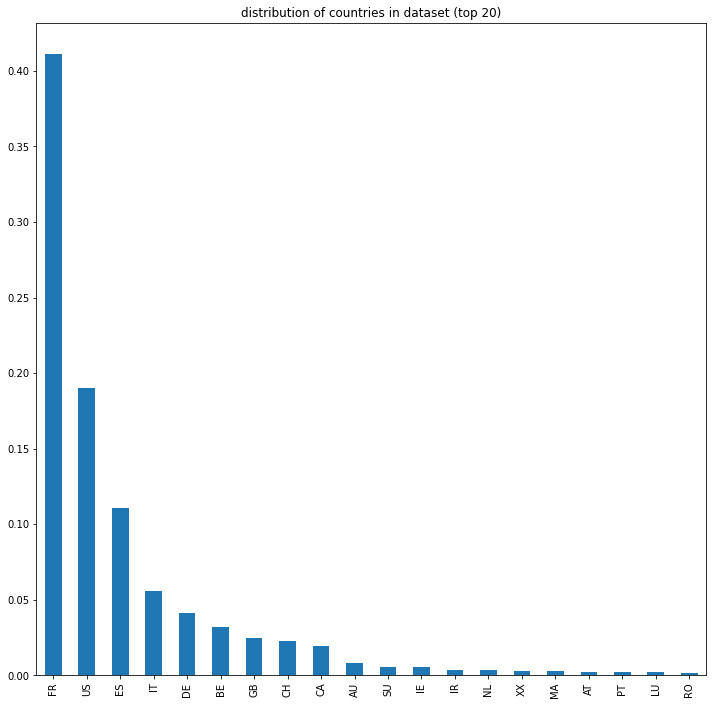

In [24]:
df['countries_cleaned_cat'].value_counts(normalize=True).head(20).plot(kind='bar', figsize=(12,12), title='distribution of countries in dataset (top 20)')

The diagram above shows our dataset is composed of product coming in majority from France, US, Spain and Italy. The other countries represents less than 5% each.

In [25]:
# df.to_csv("./tmp/df_03_quali.csv")
df.to_pickle("./tmp/df_03_quali.gzip")